In [82]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('credit_scoring.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1000 non-null   int64  
 1   Gender                     1000 non-null   object 
 2   Marital Status             1000 non-null   object 
 3   Education Level            1000 non-null   object 
 4   Employment Status          1000 non-null   object 
 5   Credit Utilization Ratio   1000 non-null   float64
 6   Payment History            1000 non-null   float64
 7   Number of Credit Accounts  1000 non-null   int64  
 8   Loan Amount                1000 non-null   int64  
 9   Interest Rate              1000 non-null   float64
 10  Loan Term                  1000 non-null   int64  
 11  Type of Loan               1000 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


Below is the description of all the features in the data:

    Age: This feature represents the age of the individual.
    Gender: This feature captures the gender of the individual.
    Marital Status: This feature denotes the marital status of the individual.
    Education Level: This feature represents the highest level of education attained by the individual.
    Employment Status: This feature indicates the current employment status of the individual.
    Credit Utilization Ratio: This feature reflects the ratio of credit used by the individual compared to their total available credit limit.
    Payment History: It represents the monthly net payment behaviour of each customer, taking into account factors such as on-time payments, late payments,
    missed payments, and defaults.
    Number of Credit Accounts: It represents the count of active credit accounts the person holds.
    Loan Amount: It indicates the monetary value of the loan.
    Interest Rate: This feature represents the interest rate associated with the loan.
    Loan Term: This feature denotes the duration or term of the loan.
    Type of Loan: It includes categories like “Personal Loan,” “Auto Loan,” or potentially other types of loans.


In [83]:
data.describe()

,Age,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,42.702000,0.509950,1452.814000,5.580000,2.471401e+06,10.686600,37.128000
std,13.266771,0.291057,827.934146,2.933634,1.387047e+06,5.479058,17.436274
min,20.000000,0.000000,0.000000,1.000000,1.080000e+05,1.010000,12.000000
25%,31.000000,0.250000,763.750000,3.000000,1.298000e+06,6.022500,24.000000
50%,42.000000,0.530000,1428.000000,6.000000,2.437500e+06,10.705000,36.000000
75%,54.000000,0.750000,2142.000000,8.000000,3.653250e+06,15.440000,48.000000
max,65.000000,1.000000,2857.000000,10.000000,4.996000e+06,19.990000,60.000000


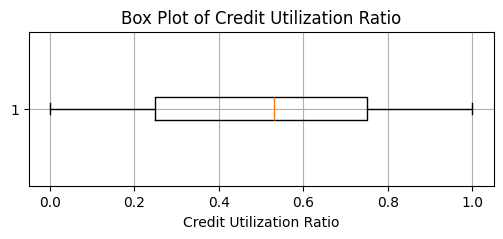

In [84]:
plt.figure(figsize=(6,2))
plt.boxplot(data["Credit Utilization Ratio"], vert=False)
plt.title('Box Plot of Credit Utilization Ratio')
plt.xlabel('Credit Utilization Ratio')
plt.grid(True)
plt.show()

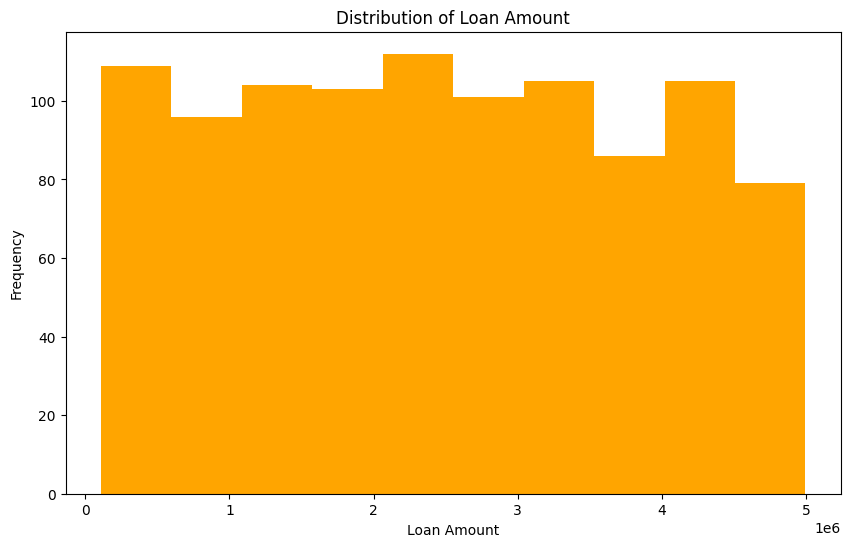

In [85]:


plt.figure(figsize=(10,6))
plt.hist(data["Loan Amount"], bins=10, color="orange")
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')

plt.show()


In [86]:
cormat=data[['Credit Utilization Ratio', 
                   'Payment History', 
                   'Number of Credit Accounts', 
                   'Loan Amount', 'Interest Rate', 
                   'Loan Term']].corr()
cormat

,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term
Credit Utilization Ratio,1.000000,0.002114,-0.001842,-0.014918,0.048237,-0.022924
Payment History,0.002114,1.000000,0.025022,-0.019084,-0.017618,-0.045532
Number of Credit Accounts,-0.001842,0.025022,1.000000,0.032232,-0.001083,0.012794
Loan Amount,-0.014918,-0.019084,0.032232,1.000000,0.045288,0.014283
Interest Rate,0.048237,-0.017618,-0.001083,0.045288,1.000000,0.028190
Loan Term,-0.022924,-0.045532,0.012794,0.014283,0.028190,1.000000


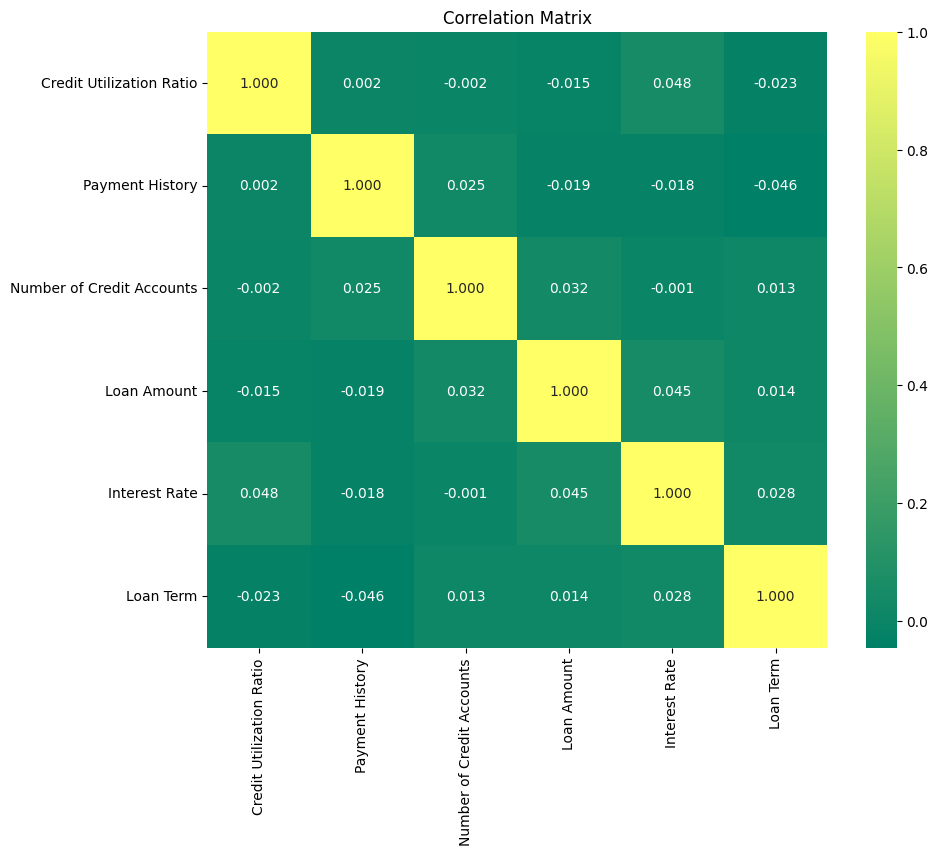

In [87]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(cormat, annot=True, cmap='summer', fmt=".3f")
plt.title('Correlation Matrix')
plt.show()

In [88]:
#Mapping Weights for FICO 

weights = {
    'Payment History': 0.35,
    'Credit Utilization Ratio': 0.30,
    'Number of Credit Accounts': 0.15,
    'Education Level': 0.10,
    'Employment Status': 0.10
}

# Mapping categorical features to numerical values
education_level_mapping = {'High School': 1, 'Bachelor': 2, 'Master': 3, 'PhD': 4}
employment_status_mapping = {'Unemployed': 0, 'Employed': 1, 'Self-Employed': 2}

data['Education Level'] = data['Education Level'].map(education_level_mapping)
data['Employment Status'] = data['Employment Status'].map(employment_status_mapping)

data['Credit Score'] = (
    data['Payment History'] * weights['Payment History'] +
    data['Credit Utilization Ratio'] * weights['Credit Utilization Ratio'] +
    data['Number of Credit Accounts'] * weights['Number of Credit Accounts'] +
    data['Education Level'] * weights['Education Level'] +
    data['Employment Status'] * weights['Employment Status']
)

data.head()


,Age,Gender,Marital Status,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Type of Loan,Credit Score
0,60,Male,Married,3,1,0.22,2685.0,2,4675000,2.65,48,Personal Loan,940.516
1,25,Male,Married,1,0,0.20,2371.0,9,3619000,5.19,60,Auto Loan,831.360
2,30,Female,Single,3,1,0.22,2771.0,6,957000,2.76,12,Auto Loan,971.216
3,58,Female,Married,4,0,0.12,1371.0,2,4731000,6.57,60,Auto Loan,480.586
4,32,Male,Married,2,2,0.99,828.0,2,3289000,6.28,36,Personal Loan,290.797


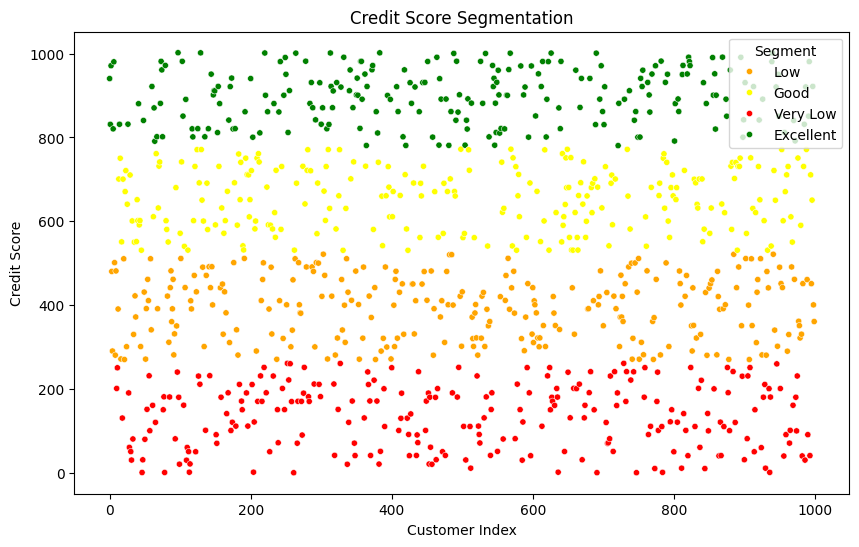

In [97]:

from sklearn.cluster import KMeans
X = data[['Credit Score']]
kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
kmeans.fit(X)
data['Segment'] = kmeans.labels_
data['Segment'] = data['Segment'].astype('category')
data['Segment'] = data['Segment'].map({2: 'Very Low', 
                                       0: 'Low',
                                       1: 'Good',
                                       3: "Excellent"})


segment_counts = data['Segment'].value_counts(normalize=True) * 100
segment_counts

segment_colors = {
    'Very Low': 'red',
    'Low': 'orange',
    'Good': 'yellow',
    'Excellent': 'green'
}
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(data=data, x=data.index, y='Credit Score', hue='Segment', palette=segment_colors, s=20)
plt.title('Credit Score Segmentation')
plt.xlabel('Customer Index')
plt.ylabel('Credit Score')
plt.legend(title='Segment', loc='upper right')

plt.show()